<a href="https://colab.research.google.com/github/NerminWEST/Kaggle_Dataset_Fish_Model1.0/blob/main/MobileNetV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Fish Species Detection & Recognition using Deep Learning

---

**Project Name: Fish Species Detection & Recognition using Deep Learning**

---

<center> <img src = "https://giffiles.alphacoders.com/202/20291.gif" width = 50%>

## Workflow of this notebook<a name ="h8"></a>
**1)** [Introducing the Problem](#h1)      
**2)** [Understanding the Dataset](#h2)    
**3)** [Importing necessary libraries and modules for this notebook](#h3)      
**4)** [Exploratory Analysis](#h4)           
**5)** [Image Generation & Preprocessing](#h5)   
**6)** [Model Training & Evaluation](#h6)        


## Introduction to the Problem<a name ="h1"></a>

<p align="justify">Estimating the relative abundance of fish species in their habitats on a regular basis and keeping an eye on population fluctuations are crucial tasks for marine scientists and conservationists. Diverse automatic computer-based fish sample methods have been demonstrated in underwater photos and videos as alternatives to time-consuming hand sampling. There isn't, however, a perfect method for automatically detecting fish and classifying their species. This is mostly due to the difficulties in producing clear underwater images and videos, which include environmental fluctuations in lighting, fish camouflage, dynamic backdrops, murky water, low resolution, shape deformations of moving fish, and tiny variances between some fish species.

## Understanding the Dataset<a name ="h2"></a>

[This dataset](https://www.kaggle.com/datasets/crowww/a-large-scale-fish-dataset) contains 9 different seafood types - These include gilt head bream, red sea bream, sea bass, red mullet, horse mackerel, black sea sprat, striped red mullet, trout, shrimp image samples. For each class, there are 1000 augmented images and their pair-wise augmented ground truths. Each class can be found in the "Fish_Dataset" file with their ground truth labels. All images for each class are ordered from "00000.png" to "01000.png".


<p align="justify">For example, if you want to access the ground truth images of the shrimp in the dataset, the order should be followed is "Fish->Shrimp->Shrimp GT".

For the purpose of this analysis, we shall be using only the augmented images.
--


*Credits to this dataset -*

O.Ulucan, D.Karakaya, and M.Turkan.(2020) A large-scale dataset for fish segmentation and classification.
In Conf. Innovations Intell. Syst. Appli. (ASYU)


## Importing necessary libraries and modules for this notebook<a name ="h3"></a>

In [1]:
'''Data Handling & Linear Algebra'''
import numpy as np
import pandas as pd
import os

'''Visualisation'''
import matplotlib.pyplot as plt
import seaborn as sns

'''Manipulating Data and Model Building'''
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

'''Implementation of Transfer Learning'''
from tensorflow.keras.applications import MobileNetV2

'''Image generation and preprocessing'''
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

'''Result and Performance Analysis'''
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

'''Ignoring Warnings'''
import warnings
warnings.filterwarnings("ignore")

## Exploratory Analysis<a name ="h4"></a>

In [3]:
import os
import kagglehub

# Download dataset
path = kagglehub.dataset_download("crowww/a-large-scale-fish-dataset")
print("Dataset downloaded to:", path)

# Correct DIR path
DIR = os.path.join(path, "Fish_Dataset", "Fish_Dataset")

# Validate
if not os.path.exists(DIR):
    raise Exception(f"❌ DIR does not exist: {DIR}")

# Extract classes
classes = [d for d in os.listdir(DIR) if os.path.isdir(os.path.join(DIR, d))]

print("✔ Classes detected:")
print(classes)


100%|██████████| 3.24G/3.24G [02:31<00:00, 23.0MB/s]

Extracting files...


Dataset downloaded to: /root/.cache/kagglehub/datasets/crowww/a-large-scale-fish-dataset/versions/2
✔ Classes detected:
['Red Sea Bream', 'Hourse Mackerel', 'Shrimp', 'Red Mullet', 'Sea Bass', 'Striped Red Mullet', 'Trout', 'Black Sea Sprat', 'Gilt-Head Bream']


In [36]:
# --- IMPORTS ---
import os
import pandas as pd

# --- SET THE CORRECT DATASET DIRECTORY ---
DIR = "/root/.cache/kagglehub/datasets/crowww/a-large-scale-fish-dataset/versions/2/Fish_Dataset/Fish_Dataset"

# --- VALIDATE DIRECTORY ---
if not os.path.exists(DIR):
    raise Exception(f"❌ The directory does NOT exist:\n{DIR}\nCheck your dataset structure.")

# --- SHOW FOLDERS INSIDE DATASET (CLASSES) ---
print("Contents of DIR:")
print(os.listdir(DIR))

# --- EXTRACT CLASS FOLDERS ---
classes = [folder for folder in os.listdir(DIR) if os.path.isdir(os.path.join(DIR, folder))]

print("\n✔ Classes detected:")
for c in classes:
    print(" -", c)

# --- READY FOR NEXT STEP (creating dataframe) ---
print("\nDIR is ready. You can now run the dataframe creation cell.")


Contents of DIR:
['Red Sea Bream', 'Segmentation_example_script.m', 'Hourse Mackerel', 'Shrimp', 'license.txt', 'README.txt', 'Red Mullet', 'Sea Bass', 'Striped Red Mullet', 'Trout', 'Black Sea Sprat', 'Gilt-Head Bream']

✔ Classes detected:
 - Red Sea Bream
 - Hourse Mackerel
 - Shrimp
 - Red Mullet
 - Sea Bass
 - Striped Red Mullet
 - Trout
 - Black Sea Sprat
 - Gilt-Head Bream

DIR is ready. You can now run the dataframe creation cell.


In [5]:
'''Since the GT images are of no use to us for the analysis, we will be separating them out of our directory'''

# Create a dataframe with a column which consists of all the filepaths (without GT) and its respective label as the other column

label = []
path = []

for dirname, _,filenames in os.walk(DIR):
    for filename in filenames:
        if os.path.splitext(filename)[-1]=='.png':               # If filename contains .png
            if dirname.split()[-1]!='GT':                       # If directory doesn't contain GT
                label.append(os.path.split(dirname)[-1])         # Append the directory name to label
                path.append(os.path.join(dirname,filename))     # Append all the png files to path of that directory

# Ready to create the df
df = pd.DataFrame(columns=['path','label'])
df['path']=path
df['label']=label

In [6]:
df.head()

,path,label
0,/root/.cache/kagglehub/datasets/crowww/a-large...,Red Sea Bream
1,/root/.cache/kagglehub/datasets/crowww/a-large...,Red Sea Bream
2,/root/.cache/kagglehub/datasets/crowww/a-large...,Red Sea Bream
3,/root/.cache/kagglehub/datasets/crowww/a-large...,Red Sea Bream
4,/root/.cache/kagglehub/datasets/crowww/a-large...,Red Sea Bream


In [7]:
df.path[0]

'/root/.cache/kagglehub/datasets/crowww/a-large-scale-fish-dataset/versions/2/Fish_Dataset/Fish_Dataset/Red Sea Bream/Red Sea Bream/00145.png'

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    9000 non-null   object
 1   label   9000 non-null   object
dtypes: object(2)
memory usage: 140.8+ KB


In [9]:
#Checking the value counts of each of the datasets
#df['label']=df['label'].astype('category')
df['label'].value_counts()

,count
label,
Red Sea Bream,1000
Hourse Mackerel,1000
Shrimp,1000
Red Mullet,1000
Sea Bass,1000
Striped Red Mullet,1000
Trout,1000
Black Sea Sprat,1000
Gilt-Head Bream,1000


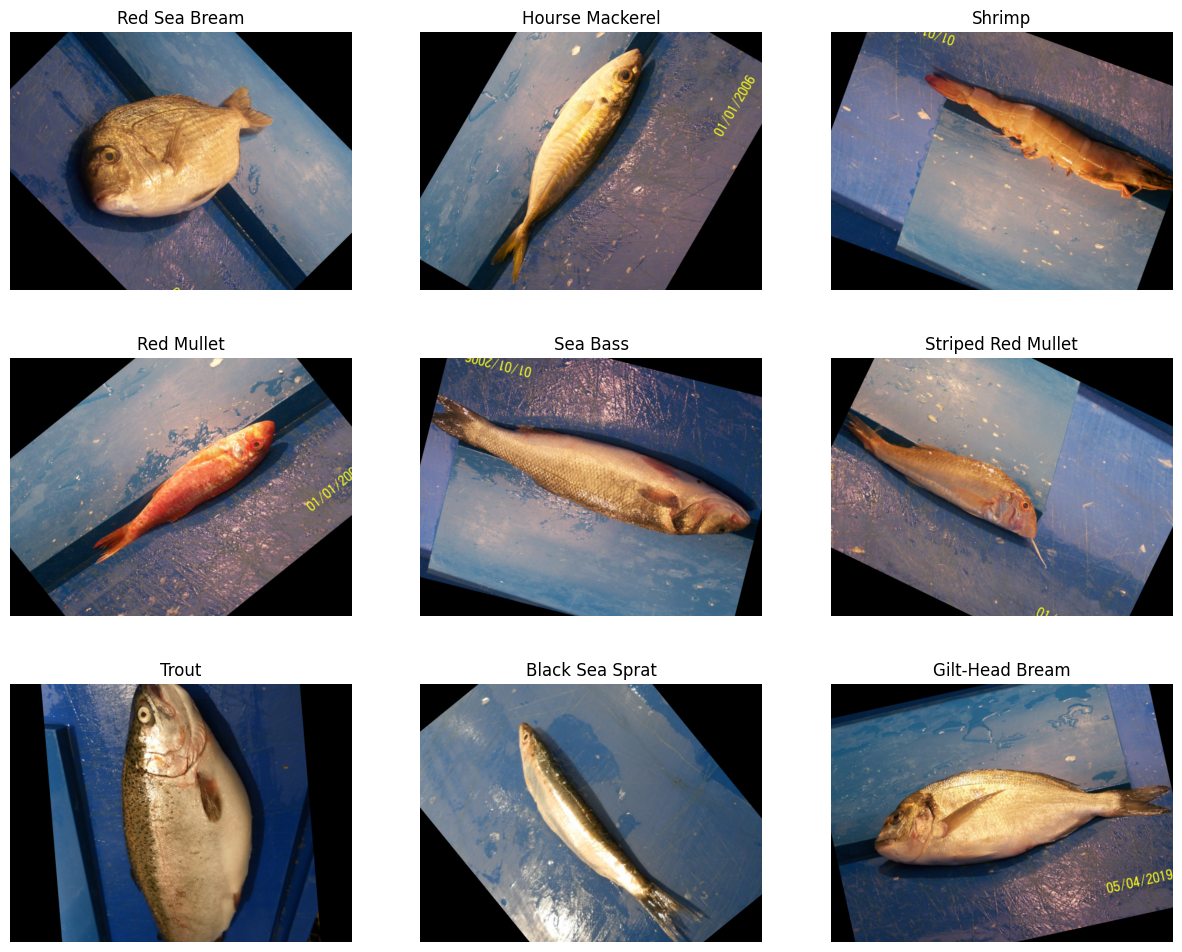

In [10]:
idx = 0
plt.figure(figsize=(15,12))
for unique_label in df['label'].unique():
    plt.subplot(3, 3, idx+1)
    plt.imshow(plt.imread(df[df['label']==unique_label].iloc[0,0]))
    plt.title(unique_label)
    plt.axis('off')
    idx+=1

## Test-Train Split

In [11]:
#Creating the test train split with shuffle
train_df, test_df = train_test_split(df, train_size=0.8, shuffle=True, random_state=42)

In [12]:
#Checking the shaoe of the newly obtained data
print(train_df.shape)
print(test_df.shape)

(7200, 2)
(1800, 2)


## Image Generation and Preprocessing<a name ="h5"></a>

In [13]:
#Using Keras Image Data Generator to preprocess our images with the model we wish to use
train_generator = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2)
test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

In [14]:
train_images = train_generator.flow_from_dataframe(dataframe=train_df, x_col='path', y_col='label', target_size=(224, 224), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=True, seed=42, subset='training')
val_images = train_generator.flow_from_dataframe(dataframe=train_df, x_col='path', y_col='label', target_size=(224, 224), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=True, seed=42, subset='validation' )
test_images = test_generator.flow_from_dataframe(dataframe=test_df, x_col='path', y_col='label', target_size=(224, 224), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=False )

Found 5760 validated image filenames belonging to 9 classes.
Found 1440 validated image filenames belonging to 9 classes.
Found 1800 validated image filenames belonging to 9 classes.


In [15]:
display(train_images.class_indices)
display(val_images.class_indices)
display(test_images.class_indices)

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

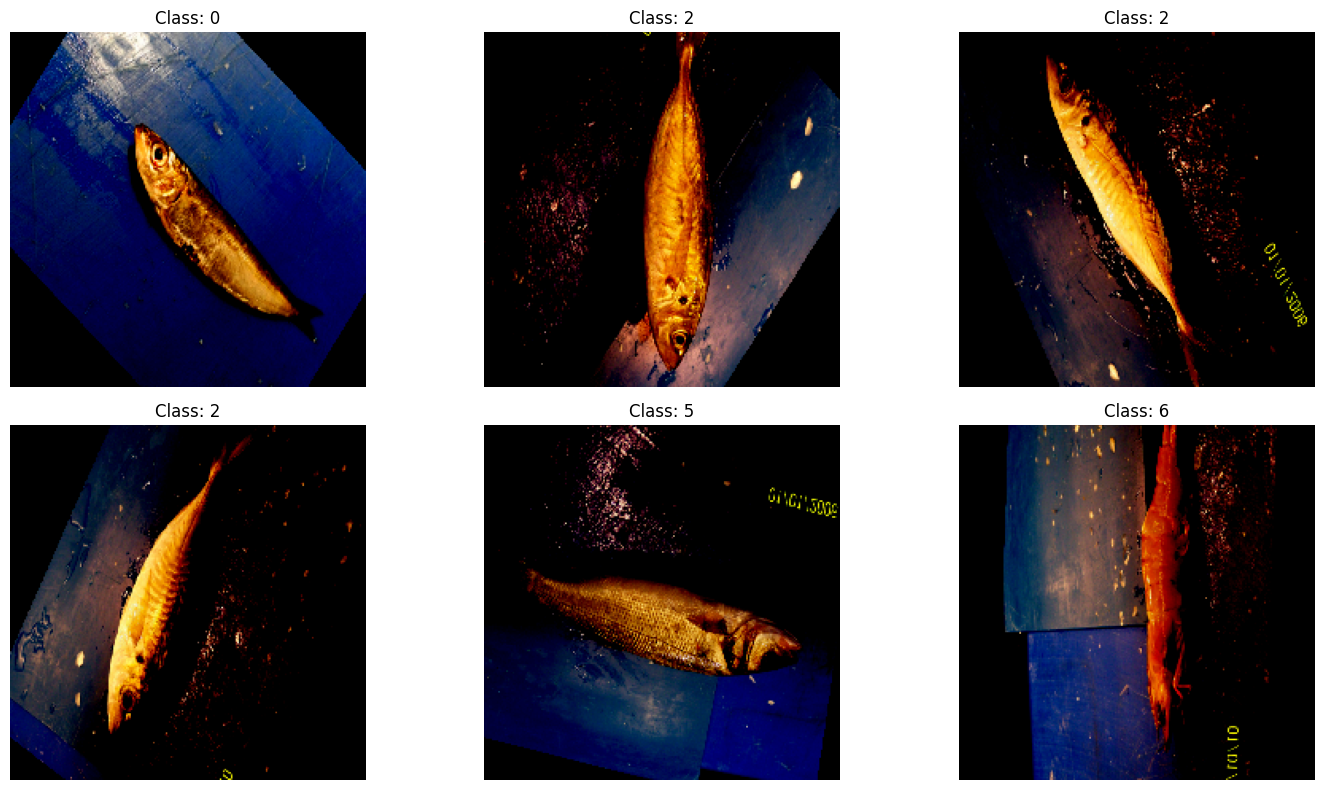

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,8))
ax = ax.flatten()

for j in range(6):
    img, label = next(test_images)     # CORRECT way to get batch
    ax[j].imshow(img[0])

    # Convert one-hot → class index
    if hasattr(label, "__len__") and len(label[0]) > 1:
        class_id = label[0].argmax()
    else:
        class_id = label[0]

    ax[j].set_title(f"Class: {class_id}")
    ax[j].axis("off")

plt.tight_layout()
plt.show()


## Model Training and Evaluation<a name ="h6"></a>

## MobileNet v2 Architecture -
<center> <img src = "https://1.bp.blogspot.com/-M8UvZJWNW4E/WsKk-tbzp8I/AAAAAAAAChw/OqxBVPbDygMIQWGug4ZnHNDvuyK5FBMcQCLcBGAs/s1600/image5.png" width = 60%></center>

<p align="justify">MobileNetV2 is a convolutional neural network architecture that seeks to perform well on mobile devices. It is based on an inverted residual structure where the residual connections are between the bottleneck layers. The intermediate expansion layer uses lightweight depthwise convolutions to filter features as a source of non-linearity. As a whole, the architecture of MobileNetV2 contains the initial fully convolution layer with 32 filters, followed by 19 residual bottleneck layers.


In [18]:
#Importing our pretrained model : MobileNetV2

pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [19]:
#Creating our model inputs
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(9, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(train_images,
                    validation_data=val_images,
                    epochs=5)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,439,625 (9.31 MB)

 Trainable params: 181,641 (709.54 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/5
180/180 ━━━━━━━━━━━━━━━━━━━━ 88s 388ms/step - accuracy: 0.8572 - loss: 0.4957 - val_accuracy: 0.9792 - val_loss: 0.0750
Epoch 2/5
180/180 ━━━━━━━━━━━━━━━━━━━━ 63s 353ms/step - accuracy: 0.9961 - loss: 0.0189 - val_accuracy: 0.9951 - val_loss: 0.0129
Epoch 3/5
180/180 ━━━━━━━━━━━━━━━━━━━━ 63s 353ms/step - accuracy: 0.9994 - loss: 0.0036 - val_accuracy: 0.9986 - val_loss: 0.0047
Epoch 4/5
180/180 ━━━━━━━━━━━━━━━━━━━━ 63s 351ms/step - accuracy: 1.0000 - loss: 9.8560e-04 - val_accuracy: 0.9986 - val_loss: 0.0047
Epoch 5/5
180/180 ━━━━━━━━━━━━━━━━━━━━ 82s 350ms/step - accuracy: 1.0000 - loss: 5.7818e-04 - val_accuracy: 0.9986 - val_loss: 0.0035


In [20]:
results = model.evaluate(test_images, verbose=0)
print("Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

Test Loss: 0.00213
Test Accuracy: 99.94%


In [21]:
pred = model.predict(test_images)
pred=np.argmax(pred,axis=1)

57/57 ━━━━━━━━━━━━━━━━━━━━ 24s 351ms/step


In [22]:
pred_df=test_df.copy()
labels={}
for l,v in test_images.class_indices.items():
    labels.update({v:l})
pred_df['pred']=pred
pred_df['pred']=pred_df['pred'].apply(lambda x: labels[x])

In [23]:
# Visualize the pred_df
pred_df=pred_df.reset_index(drop=True)
pred_df.head(10)

,path,label,pred
0,/root/.cache/kagglehub/datasets/crowww/a-large...,Black Sea Sprat,Black Sea Sprat
1,/root/.cache/kagglehub/datasets/crowww/a-large...,Hourse Mackerel,Hourse Mackerel
2,/root/.cache/kagglehub/datasets/crowww/a-large...,Red Sea Bream,Red Sea Bream
3,/root/.cache/kagglehub/datasets/crowww/a-large...,Sea Bass,Sea Bass
4,/root/.cache/kagglehub/datasets/crowww/a-large...,Gilt-Head Bream,Gilt-Head Bream
5,/root/.cache/kagglehub/datasets/crowww/a-large...,Gilt-Head Bream,Gilt-Head Bream
6,/root/.cache/kagglehub/datasets/crowww/a-large...,Striped Red Mullet,Striped Red Mullet
7,/root/.cache/kagglehub/datasets/crowww/a-large...,Gilt-Head Bream,Gilt-Head Bream
8,/root/.cache/kagglehub/datasets/crowww/a-large...,Red Mullet,Red Mullet
9,/root/.cache/kagglehub/datasets/crowww/a-large...,Sea Bass,Sea Bass


In [24]:
# Incorrect prediction
pred_df[pred_df['label']!=pred_df['pred']]

,path,label,pred
1157,/root/.cache/kagglehub/datasets/crowww/a-large...,Shrimp,Striped Red Mullet


In [25]:
pred_df.path[1604]

'/root/.cache/kagglehub/datasets/crowww/a-large-scale-fish-dataset/versions/2/Fish_Dataset/Fish_Dataset/Striped Red Mullet/Striped Red Mullet/00397.png'

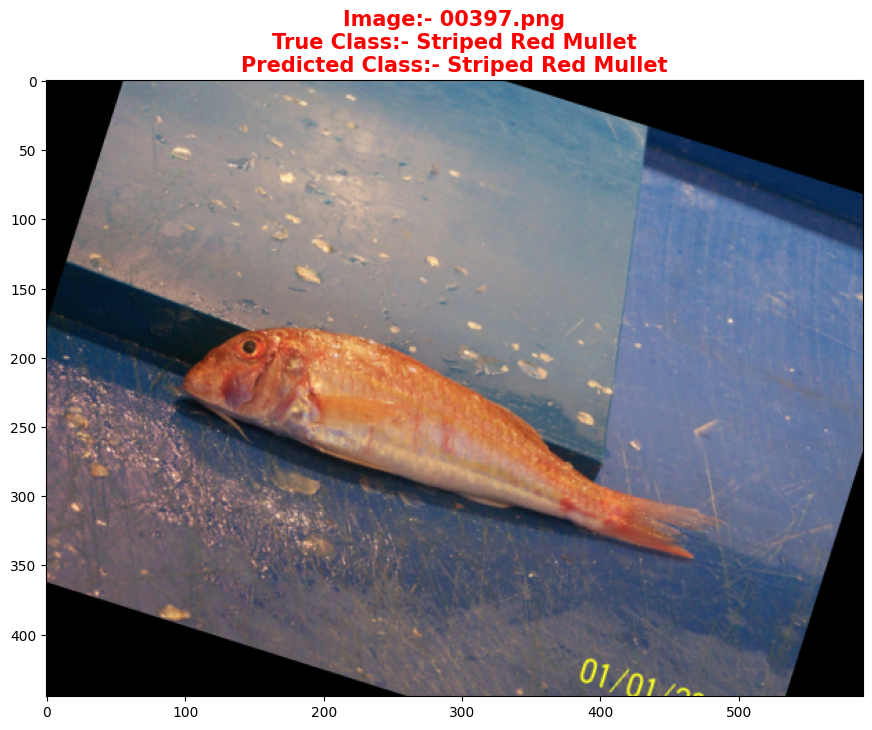

In [26]:
# Which image was it?
plt.figure(figsize=(15,8))
plt.imshow(plt.imread(pred_df.path[1604]))
title1 = pred_df.path[1604].split('/')[-2]
title2 = pred_df.path[1604].split('/')[-1]
title3 = pred_df.pred[1604]
plt.title(f'Image:- {title2}\nTrue Class:- {title1}\nPredicted Class:- {title3}', color = 'r', weight = 'bold', fontsize = 15)
plt.show()

Accuracy Score: 0.9994444444444445


<Axes: >

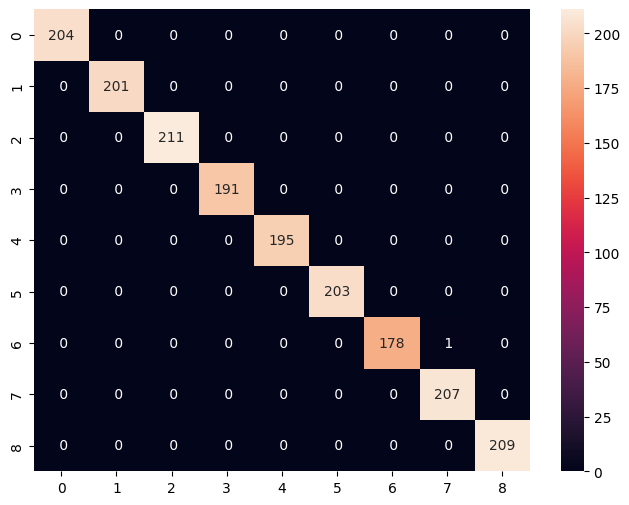

In [28]:
#Checking the accuracy score and creating a Confusion Matrix
print(f"Accuracy Score: {accuracy_score(pred_df['label'],pred_df['pred'])}")
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(pred_df['label'],pred_df['pred']), annot=True, fmt='2d')

In [29]:
#Generating the Classification Report for in-depth analysis
print(classification_report(pred_df['label'],pred_df['pred']))

                    precision    recall  f1-score   support

   Black Sea Sprat       1.00      1.00      1.00       204
   Gilt-Head Bream       1.00      1.00      1.00       201
   Hourse Mackerel       1.00      1.00      1.00       211
        Red Mullet       1.00      1.00      1.00       191
     Red Sea Bream       1.00      1.00      1.00       195
          Sea Bass       1.00      1.00      1.00       203
            Shrimp       1.00      0.99      1.00       179
Striped Red Mullet       1.00      1.00      1.00       207
             Trout       1.00      1.00      1.00       209

          accuracy                           1.00      1800
         macro avg       1.00      1.00      1.00      1800
      weighted avg       1.00      1.00      1.00      1800



#### We have achieved an accuracy of 100%, which clearly demonstrates the power of transfer learning.



---

### References to learn more -
1. [A Comprehensive Hands-on Guide to Transfer Learning with Real-World Applications in Deep Learning - Towards Data Science](https://towardsdatascience.com/a-comprehensive-hands-on-guide-to-transfer-learning-with-real-world-applications-in-deep-learning-212bf3b2f27a)
2. [Introduction to Transfer Learning - Geeks for Geeks](https://www.geeksforgeeks.org/ml-introduction-to-transfer-learning/)
3. [Another example to classify images of cats and dogs by using transfer learning from a pre-trained network - Tensorflow](https://www.tensorflow.org/tutorials/images/transfer_learning)
